In [15]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")
import prepare
import acquire

from acquire import get_all_sales_data

In [2]:
df = get_all_sales_data()
df.head()

,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_amount,,,,,,,,,,,,,
13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 1.  Convert date column to datetime format.

In [3]:
df.sale_date = pd.to_datetime(df.sale_date)

In [4]:
df.head(2)

,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_amount,,,,,,,,,,,,,
13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
df.columns

Index(['sale_date', 'sale_id', 'store_id', 'store_address', 'store_city',
       'store_state', 'store_zipcode', 'item_id', 'item_brand', 'item_name',
       'item_price', 'item_upc12', 'item_upc14'],
      dtype='object')

### 2. Plot the distribution of sale_amount and item_price.

In [6]:
df = df.reset_index()
df.head(2)

,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


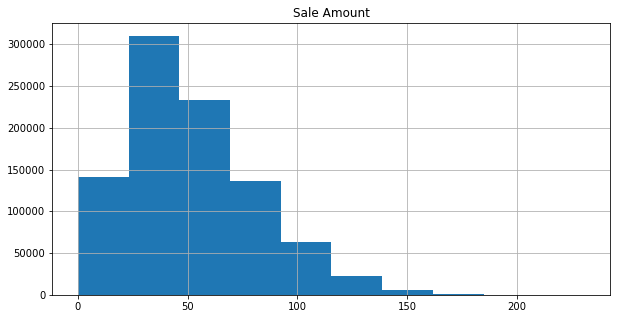

In [7]:
plt.figure(figsize=(10,5))
df.sale_amount.hist()
plt.title('Sale Amount')
#df2.item_price.hist(label='item_price')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

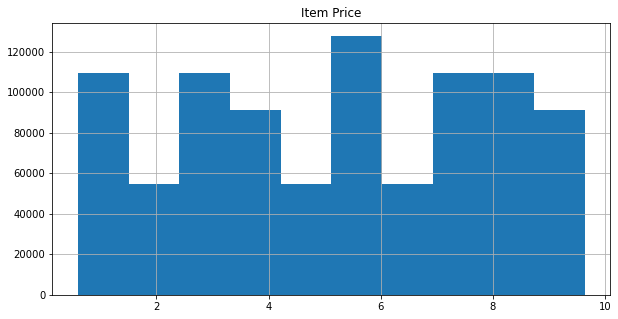

In [8]:
plt.figure(figsize=(10,5))
#df2.sale_amount.hist(label='sale_amount')
df.item_price.hist()
plt.title('Item Price')
plt.show

### 3. Set the index to be the datetime variable.

In [9]:
df = df.set_index('sale_date')
df.head()

,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03 00:00:00+00:00,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04 00:00:00+00:00,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05 00:00:00+00:00,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [10]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

In [11]:
df.head()

,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-02 00:00:00+00:00,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Wednesday
2013-01-03 00:00:00+00:00,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Thursday
2013-01-04 00:00:00+00:00,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Friday
2013-01-05 00:00:00+00:00,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Saturday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [12]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(2)

,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Wednesday,9.24


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [13]:
df = prepare.prep_all_sales(df)
df.head(2)

AttributeError: 'DataFrame' object has no attribute 'sale_date'

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [16]:
germany_df = acquire.get_germany_power()
germany_df.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [17]:
germany_df.Date = pd.to_datetime(germany_df.Date)
germany_df.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [20]:
germany_df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

### 2. Plot the distribution of each of your variables.

In [23]:
germany_df.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

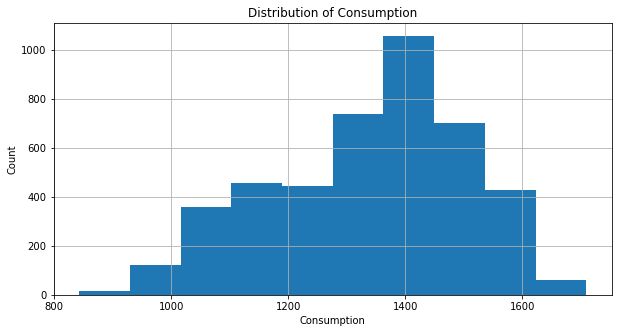

In [32]:
plt.figure(figsize=(10,5))
germany_df.Consumption.hist()
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Count')
plt.show()

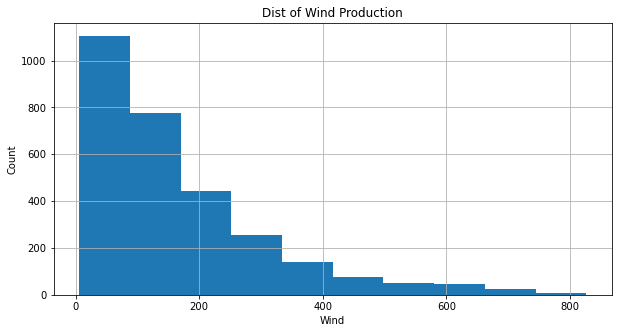

In [33]:
plt.figure(figsize=(10,5))
germany_df.Wind.hist()
plt.title('Dist of Wind Production')
plt.xlabel('Wind')
plt.ylabel('Count')
plt.show()

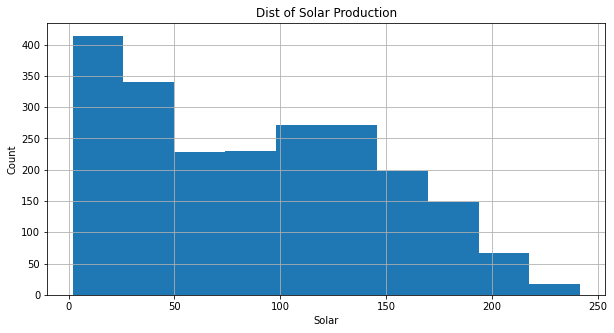

In [34]:
plt.figure(figsize=(10,5))
germany_df.Solar.hist()
plt.title('Dist of Solar Production')
plt.xlabel('Solar')
plt.ylabel('Count')
plt.show()


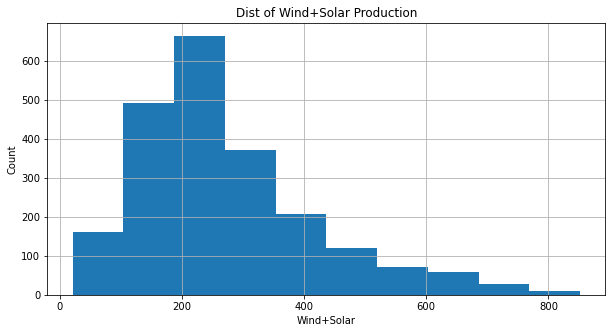

In [35]:
plt.figure(figsize=(10,5))
germany_df['Wind+Solar'].hist()
plt.title('Dist of Wind+Solar Production')
plt.xlabel('Wind+Solar')
plt.ylabel('Count')
plt.show()

### 3. Set the index to be the datetime variable.

In [37]:
germany_df = germany_df.set_index('Date')

In [38]:
germany_df.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.

In [39]:
germany_df['month'] = germany_df.index.month
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1
2006-01-02,1380.521,NaN,NaN,NaN,1
2006-01-03,1442.533,NaN,NaN,NaN,1


In [40]:
germany_df['year'] = germany_df.index.year
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006


### 5. Fill any missing values.

In [42]:
germany_df = germany_df.fillna(value=0)
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.